In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [4]:
# Đọc dữ liệu
file_path = "data/10kmau2008.csv" 
df = pd.read_csv(file_path)

# Hiển thị thông tin cơ bản
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9187 entries, 0 to 9186
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ttnt             9187 non-null   int64  
 1   dantoc           9187 non-null   int64  
 2   tsnguoi          9187 non-null   int64  
 3   thunhap          9187 non-null   float64
 4   chitieu          9187 non-null   float64
 5   chinangluong     9187 non-null   float64
 6   chitiendien      8871 non-null   float64
 7   dienticho        9187 non-null   int64  
 8   chatluongo       9187 non-null   int64  
 9   tiepcandienluoi  9187 non-null   int64  
 10  chitiendienbq    9187 non-null   float64
 11  thunhapbq        9187 non-null   float64
 12  chinangluongbq   9187 non-null   float64
 13  chitieubq        9187 non-null   float64
dtypes: float64(8), int64(6)
memory usage: 1005.0 KB


,ttnt,dantoc,tsnguoi,thunhap,chitieu,chinangluong,chitiendien,dienticho,chatluongo,tiepcandienluoi,chitiendienbq,thunhapbq,chinangluongbq,chitieubq
0,1,1,3,1343050.0,1072644.0,75226.0,24000.0,65,3,1,8000.000000,447683.33330,25075.33333,357548.00000
1,1,1,3,1536840.0,159111.0,41794.0,2950.0,100,3,1,983.333333,512280.00000,13931.33333,53037.00000
2,1,1,3,213520.0,186262.0,41116.0,840.0,22,2,1,280.000000,71173.33333,13705.33333,62087.33333
3,1,1,3,208650.0,193343.0,33000.0,8400.0,42,1,1,2800.000000,69550.00000,11000.00000,64447.66667
4,1,1,2,121600.0,101395.0,21488.0,780.0,20,1,1,390.000000,60800.00000,10744.00000,50697.50000


In [6]:
missing_values = df.isnull().sum()
print("Số lượng giá trị thiếu trong từng cột:\n", missing_values)

Số lượng giá trị thiếu trong từng cột:
 ttnt                 0
dantoc               0
tsnguoi              0
thunhap              0
chitieu              0
chinangluong         0
chitiendien        316
dienticho            0
chatluongo           0
tiepcandienluoi      0
chitiendienbq        0
thunhapbq            0
chinangluongbq       0
chitieubq            0
dtype: int64


In [8]:
# Fill NaN trong cột chitiendien bằng 0
df['chitiendien'] = df['chitiendien'].fillna(0)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9187 entries, 0 to 9186
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ttnt             9187 non-null   int64  
 1   dantoc           9187 non-null   int64  
 2   tsnguoi          9187 non-null   int64  
 3   thunhap          9187 non-null   float64
 4   chitieu          9187 non-null   float64
 5   chinangluong     9187 non-null   float64
 6   chitiendien      9187 non-null   float64
 7   dienticho        9187 non-null   int64  
 8   chatluongo       9187 non-null   int64  
 9   tiepcandienluoi  9187 non-null   int64  
 10  chitiendienbq    9187 non-null   float64
 11  thunhapbq        9187 non-null   float64
 12  chinangluongbq   9187 non-null   float64
 13  chitieubq        9187 non-null   float64
dtypes: float64(8), int64(6)
memory usage: 1005.0 KB


In [12]:
# Chọn các biến quan trọng để phân cụm
features = ['chinangluong', 'chitiendien', 'tiepcandienluoi', 'chitiendienbq', 
            'chinangluongbq', 'thunhap', 'thunhapbq', 'tsnguoi', 'ttnt', 'dantoc', 'dienticho']

# Áp dụng Min-Max Scaling để chuẩn hóa dữ liệu
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[features]), columns=features)

# Hiển thị dữ liệu đã chuẩn hóa
df_scaled.head()

,chinangluong,chitiendien,tiepcandienluoi,chitiendienbq,chinangluongbq,thunhap,thunhapbq,tsnguoi,ttnt,dantoc,dienticho
0,1.000000,1.000000,1.0,0.666667,1.000000,0.527513,0.703383,0.142857,1.0,1.0,0.109817
1,0.555278,0.122917,1.0,0.081944,0.555278,0.603716,0.805046,0.142857,1.0,1.0,0.168053
2,0.546259,0.035000,1.0,0.023333,0.546259,0.083352,0.110829,0.142857,1.0,1.0,0.038270
3,0.438297,0.350000,1.0,0.233333,0.438297,0.081437,0.108274,0.142857,1.0,1.0,0.071547
4,0.285161,0.032500,1.0,0.032500,0.428081,0.047207,0.094503,0.071429,1.0,1.0,0.034942


In [14]:
pca = PCA(n_components=0.95)  
df_pca = pca.fit_transform(df_scaled)

num_components = df_pca.shape[1]
print(f"Số thành phần PCA giữ lại: {num_components}")

Số thành phần PCA giữ lại: 4


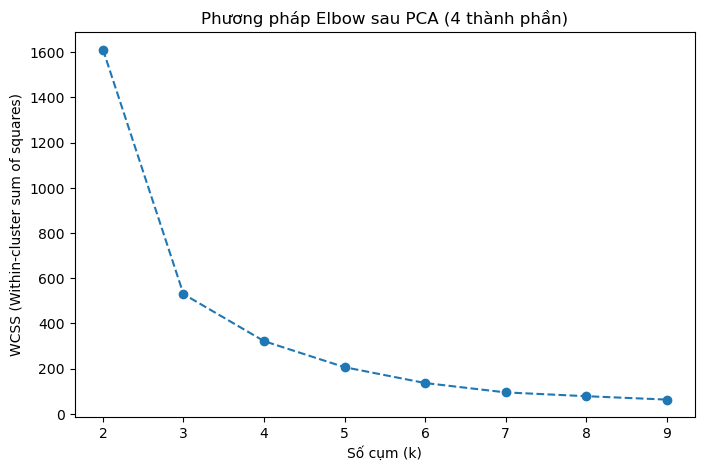

In [16]:
wcss_pca = []
K_range = range(2, 10)

for k in K_range:
    kmeans_pca = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_pca.fit(df_pca)
    wcss_pca.append(kmeans_pca.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K_range, wcss_pca, marker='o', linestyle='--')
plt.xlabel("Số cụm (k)")
plt.ylabel("WCSS (Within-cluster sum of squares)")
plt.title(f"Phương pháp Elbow sau PCA ({num_components} thành phần)")
plt.show()

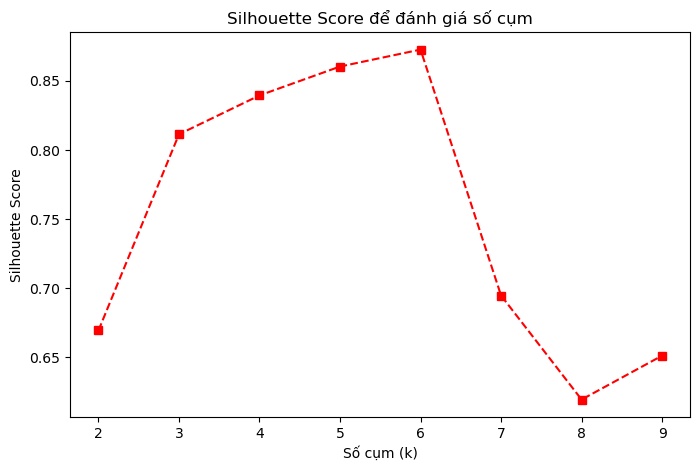

In [17]:
silhouette_scores = []
for k in K_range:
    kmeans_pca = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels_pca = kmeans_pca.fit_predict(df_pca)
    silhouette_scores.append(silhouette_score(df_pca, labels_pca))

# Vẽ biểu đồ Silhouette Score để đánh giá số cụm
plt.figure(figsize=(8,5))
plt.plot(K_range, silhouette_scores, marker='s', linestyle='--', color='r')
plt.xlabel("Số cụm (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score để đánh giá số cụm")
plt.show()

In [18]:
# Chọn số cụm tối ưu từ Elbow Method và Silhouette Score
optimal_k_pca = 3
kmeans_final = KMeans(n_clusters=optimal_k_pca, random_state=42, n_init=10)
df_scaled["Cluster_PCA"] = kmeans_final.fit_predict(df_pca)

# Thống kê số lượng hộ gia đình trong từng cụm
print("Số lượng hộ gia đình trong từng cụm:")
print(df_scaled["Cluster_PCA"].value_counts())

Số lượng hộ gia đình trong từng cụm:
Cluster_PCA
0    5536
1    2221
2    1430
Name: count, dtype: int64


In [19]:
# Ghép lại với dữ liệu gốc để phân tích
df['Cluster_PCA'] = df_scaled["Cluster_PCA"]

# Trung bình các biến trong từng cụm
cluster_summary = df.groupby("Cluster_PCA")[features].mean()
print("Trung bình các biến theo từng cụm:")
print(cluster_summary)

Trung bình các biến theo từng cụm:
             chinangluong  chitiendien  tiepcandienluoi  chitiendienbq  \
Cluster_PCA                                                              
0             3462.397652   641.187139         0.982298     175.188119   
1             6778.211481  1561.943269         0.995498     425.152651   
2             2928.651538   363.656643         0.854545      87.567180   

             chinangluongbq       thunhap     thunhapbq   tsnguoi      ttnt  \
Cluster_PCA                                                                   
0                884.376217  46930.590679  12190.169640  4.003793  0.000000   
1               1749.170122  78060.356146  20334.965799  4.052679  1.000000   
2                653.840553  32831.556503   7352.116602  4.950350  0.090909   

             dantoc  dienticho  
Cluster_PCA                     
0               1.0  66.164559  
1               1.0  73.264746  
2               0.0  67.003497  


Số lượng hộ gia đình trong từng cụm:
Cluster_PCA
0    5536
1    2221
2    1430
Name: count, dtype: int64


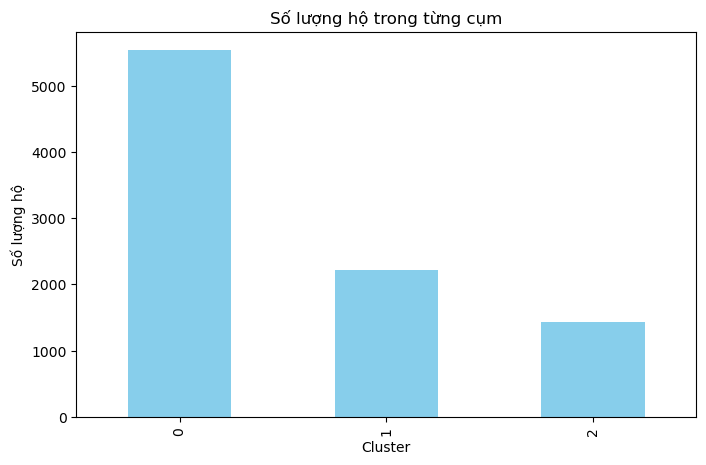

In [20]:
# Thống kê số lượng hộ gia đình trong từng cụm
cluster_counts = df['Cluster_PCA'].value_counts().sort_index()

print("Số lượng hộ gia đình trong từng cụm:")
print(cluster_counts)

# Vẽ biểu đồ số lượng hộ trong từng cụm
plt.figure(figsize=(8,5))
cluster_counts.plot(kind='bar', color='skyblue')
plt.xlabel("Cluster")
plt.ylabel("Số lượng hộ")
plt.title("Số lượng hộ trong từng cụm")
plt.show()

Đặc điểm kinh tế của từng cụm:
                  thunhap     thunhapbq       chitieu     chitieubq
Cluster_PCA                                                        
0            46930.590679  12190.169640  32866.719274   8589.942093
1            78060.356146  20334.965799  57456.564971  15183.483206
2            32831.556503   7352.116602  26763.767832   5967.181666


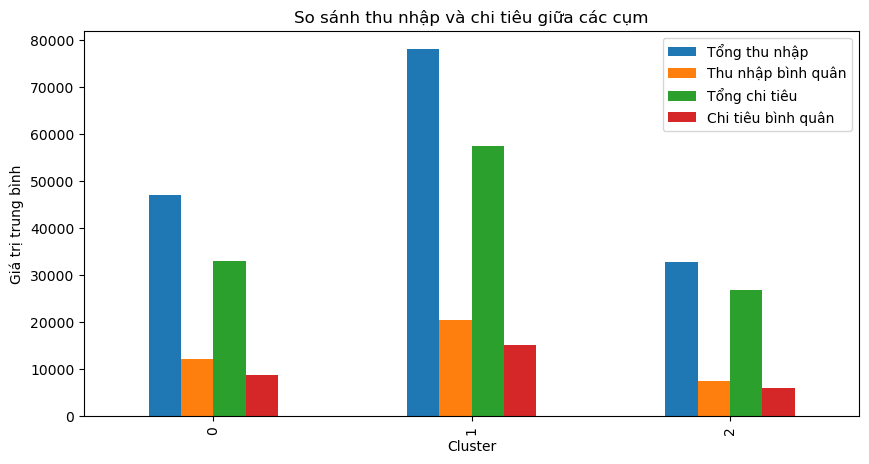

In [21]:
# Tính thu nhập và chi tiêu trung bình trong từng cụm
economic_summary = df.groupby("Cluster_PCA")[['thunhap', 'thunhapbq', 'chitieu', 'chitieubq']].mean()

print("Đặc điểm kinh tế của từng cụm:")
print(economic_summary)

# Vẽ biểu đồ so sánh thu nhập và chi tiêu trung bình giữa các cụm
economic_summary.plot(kind="bar", figsize=(10,5))
plt.xlabel("Cluster")
plt.ylabel("Giá trị trung bình")
plt.title("So sánh thu nhập và chi tiêu giữa các cụm")
plt.legend(["Tổng thu nhập", "Thu nhập bình quân", "Tổng chi tiêu", "Chi tiêu bình quân"])
plt.show()

Mức tiêu thụ năng lượng trong từng cụm:
             chinangluong  chinangluongbq  chitiendien  chitiendienbq
Cluster_PCA                                                          
0             3462.397652      884.376217   641.187139     175.188119
1             6778.211481     1749.170122  1561.943269     425.152651
2             2928.651538      653.840553   363.656643      87.567180


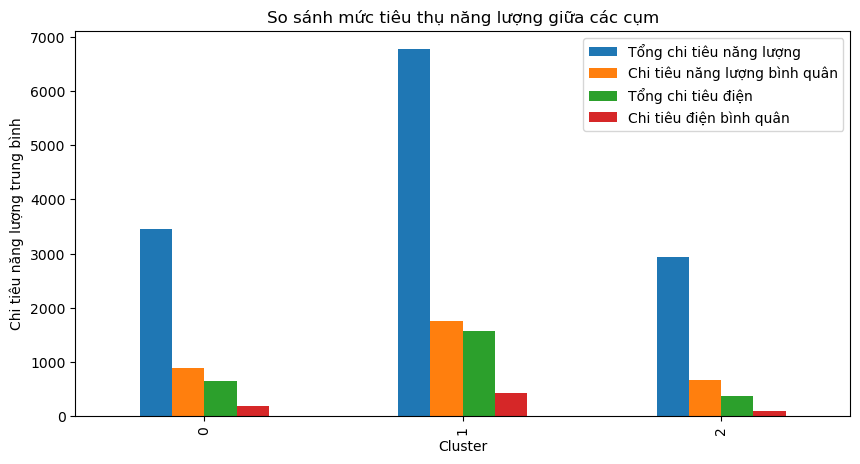

In [22]:
# Tính mức tiêu thụ năng lượng trung bình trong từng cụm
energy_summary = df.groupby("Cluster_PCA")[['chinangluong', 'chinangluongbq', 'chitiendien', 'chitiendienbq']].mean()

print("Mức tiêu thụ năng lượng trong từng cụm:")
print(energy_summary)

# Vẽ biểu đồ so sánh tiêu thụ năng lượng giữa các cụm
energy_summary.plot(kind="bar", figsize=(10,5))
plt.xlabel("Cluster")
plt.ylabel("Chi tiêu năng lượng trung bình")
plt.title("So sánh mức tiêu thụ năng lượng giữa các cụm")
plt.legend(["Tổng chi tiêu năng lượng", "Chi tiêu năng lượng bình quân", "Tổng chi tiêu điện", "Chi tiêu điện bình quân"])
plt.show()

Tỷ lệ hộ có tiếp cận điện lưới trong từng cụm (%):
Cluster_PCA
0    98.229769
1    99.549752
2    85.454545
Name: tiepcandienluoi, dtype: float64


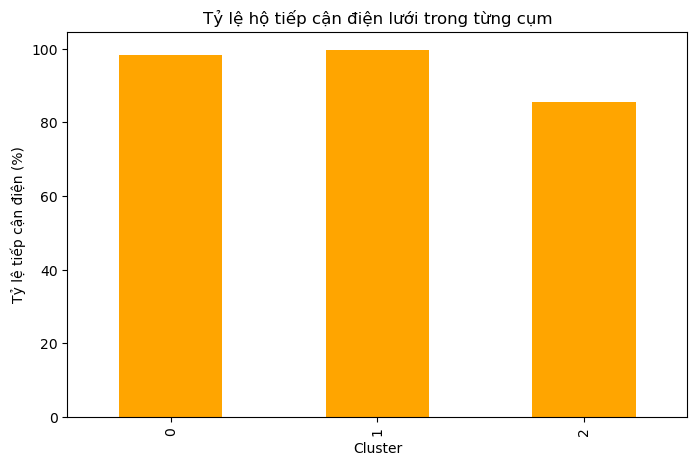

In [23]:
# Tính tỷ lệ hộ có tiếp cận điện lưới trong từng cụm
electricity_access = df.groupby("Cluster_PCA")["tiepcandienluoi"].mean() * 100

print("Tỷ lệ hộ có tiếp cận điện lưới trong từng cụm (%):")
print(electricity_access)

# Vẽ biểu đồ tỷ lệ tiếp cận điện lưới
plt.figure(figsize=(8,5))
electricity_access.plot(kind="bar", color="orange")
plt.xlabel("Cluster")
plt.ylabel("Tỷ lệ tiếp cận điện (%)")
plt.title("Tỷ lệ hộ tiếp cận điện lưới trong từng cụm")
plt.show()

Tỷ lệ hộ dân tộc thiểu số trong từng cụm (%):
Cluster_PCA
0      0.0
1      0.0
2    100.0
Name: dantoc, dtype: float64

Tỷ lệ hộ nông thôn trong từng cụm (%):
Cluster_PCA
0    100.000000
1      0.000000
2     90.909091
Name: ttnt, dtype: float64


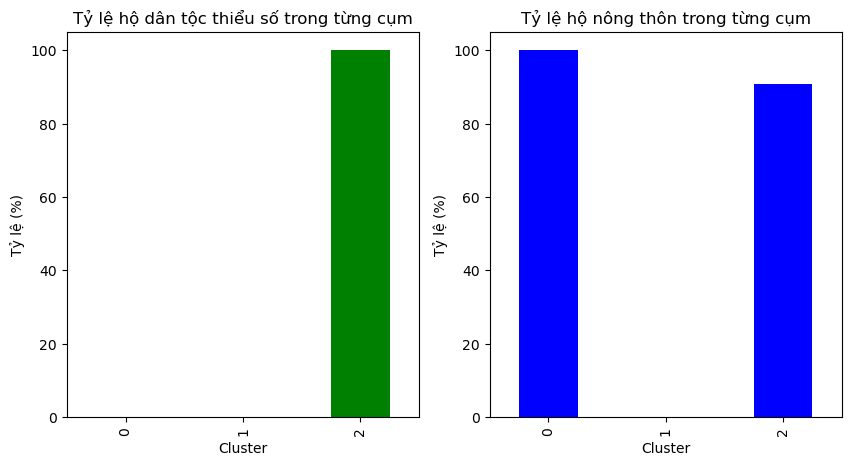

In [24]:
# Tính tỷ lệ hộ dân tộc thiểu số và hộ nông thôn trong từng cụm
ethnic_ratio = df.groupby("Cluster_PCA")["dantoc"].apply(lambda x: (x == 0).mean() * 100)
rural_ratio = df.groupby("Cluster_PCA")["ttnt"].apply(lambda x: (x == 0).mean() * 100)

print("Tỷ lệ hộ dân tộc thiểu số trong từng cụm (%):")
print(ethnic_ratio)

print("\nTỷ lệ hộ nông thôn trong từng cụm (%):")
print(rural_ratio)

# Vẽ biểu đồ
plt.figure(figsize=(10,5))

plt.subplot(1, 2, 1)
ethnic_ratio.plot(kind="bar", color="green")
plt.xlabel("Cluster")
plt.ylabel("Tỷ lệ (%)")
plt.title("Tỷ lệ hộ dân tộc thiểu số trong từng cụm")

plt.subplot(1, 2, 2)
rural_ratio.plot(kind="bar", color="blue")
plt.xlabel("Cluster")
plt.ylabel("Tỷ lệ (%)")
plt.title("Tỷ lệ hộ nông thôn trong từng cụm")

plt.show()

Đặc điểm hộ gia đình trong từng cụm:
              tsnguoi  dienticho
Cluster_PCA                     
0            4.003793  66.164559
1            4.052679  73.264746
2            4.950350  67.003497


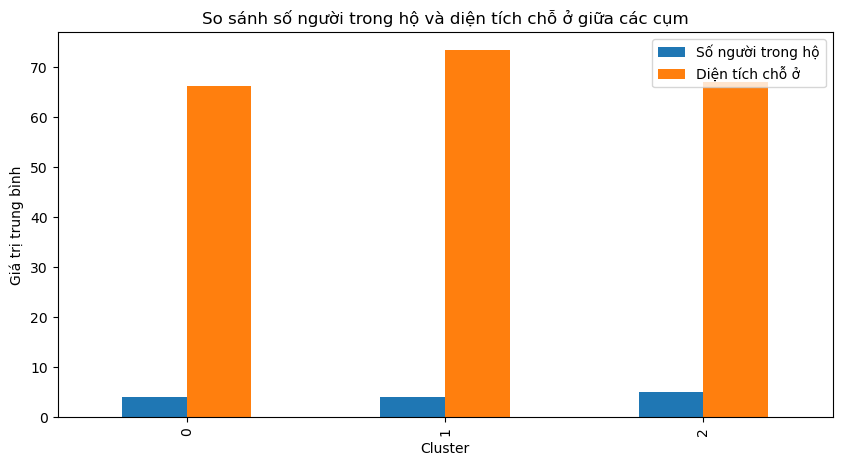

In [25]:
# Tính số người trung bình trong hộ và diện tích chỗ ở trong từng cụm
household_summary = df.groupby("Cluster_PCA")[['tsnguoi', 'dienticho']].mean()

print("Đặc điểm hộ gia đình trong từng cụm:")
print(household_summary)

# Vẽ biểu đồ so sánh đặc điểm hộ gia đình giữa các cụm
household_summary.plot(kind="bar", figsize=(10,5))
plt.xlabel("Cluster")
plt.ylabel("Giá trị trung bình")
plt.title("So sánh số người trong hộ và diện tích chỗ ở giữa các cụm")
plt.legend(["Số người trong hộ", "Diện tích chỗ ở"])
plt.show()

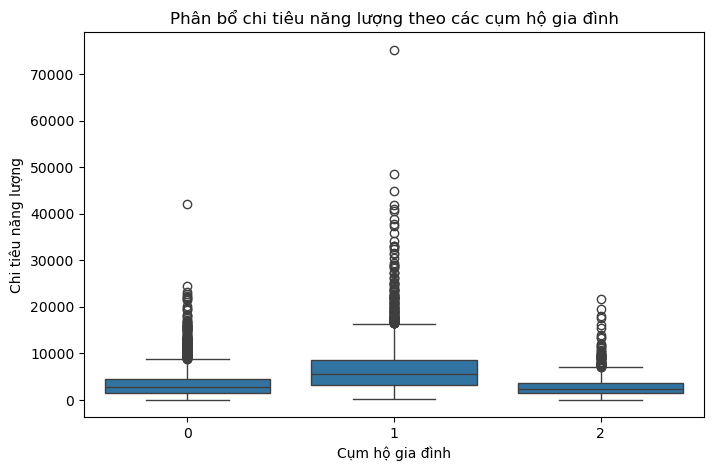

In [29]:
import seaborn as sns
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Cluster_PCA', y='chinangluong')
plt.title("Phân bổ chi tiêu năng lượng theo các cụm hộ gia đình")
plt.xlabel("Cụm hộ gia đình")
plt.ylabel("Chi tiêu năng lượng")
plt.show()